https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset Heart Attack Analysis and Prediction Dataset. Goal: create a model that predicts if patients are at risk of heart attacks from characteristics of the individual such as if it smokes, sex, blood pressure, etc

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn tensorflow keras-tuner ipywidgets


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Lionel\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

import ipywidgets as widgets
from IPython.display import display, clear_output


Importing necessary libraries

In [3]:

df = pd.read_csv('heart.csv')
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Loading CSV 
And displaying first 5 rows 

In [4]:

df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Check for missing values

In [5]:

df.describe()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Get basic statistics

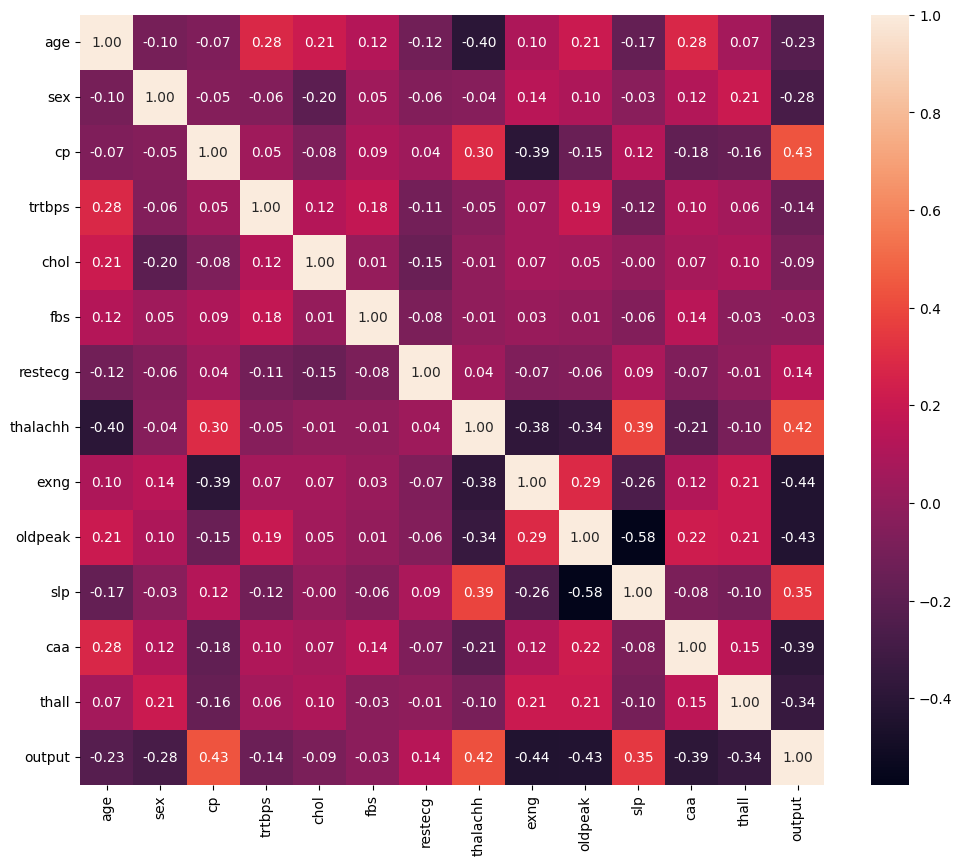

In [6]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

Visualize the correlation matrix

In [7]:
X = df.drop('output', axis=1)
y = df['output']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Define features and target variable
Standardize the features

In [8]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


Spit into training and testing sets

In [9]:

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

c:\Users\Lionel\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Define the model architecture

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1
)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5841 - loss: 0.7089 - val_accuracy: 0.6400 - val_loss: 0.6479
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6467 - loss: 0.6561 - val_accuracy: 0.6400 - val_loss: 0.6261
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7509 - loss: 0.6076 - val_accuracy: 0.6400 - val_loss: 0.6046
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7123 - loss: 0.6181 - val_accuracy: 0.6400 - val_loss: 0.5846
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7337 - loss: 0.5877 - val_accuracy: 0.6800 - val_loss: 0.5651
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7664 - loss: 0.5597 - val_accuracy: 0.7200 - val_loss: 0.5455
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7316 - loss: 0.5665 - val_accuracy: 0.7200 - val_loss: 0.5240
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7456 - loss: 0.5455 - val_accuracy: 0.7600 - val_los

Train the model

In [12]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.2f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8501 - loss: 0.4546

Test Accuracy: 0.87


Evaluate on the test set

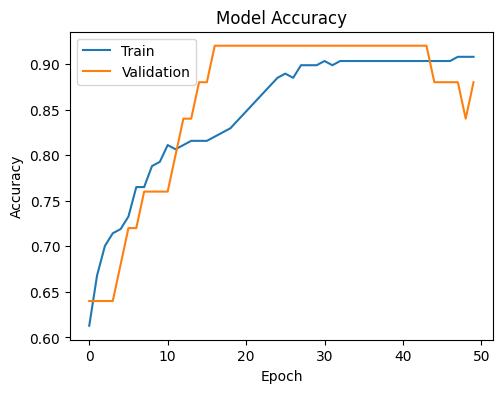

In [13]:

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

Plot training & validation accuracy values

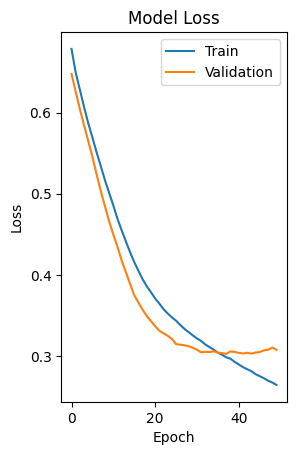

In [14]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [15]:
plt.show()

Predict probabilities

In [16]:

y_pred_prob = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


Convert probabilities to class labels

In [17]:

y_pred = (y_pred_prob > 0.5).astype(int).flatten()

Classification Report

In [18]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Confusion Matrix

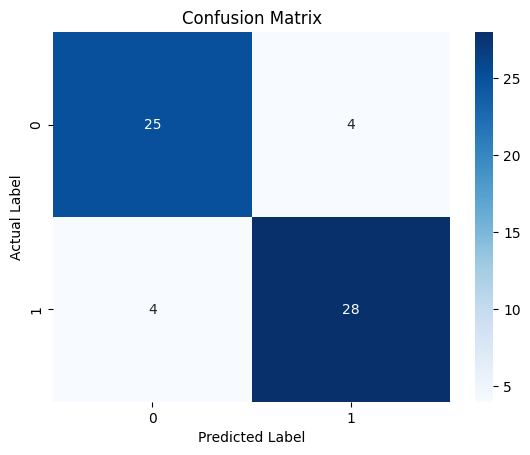

In [19]:

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


In [20]:
def build_model(hp):
    model = keras.Sequential()

Tune the number of layers between 1 and 3
Add dropout to prevent overfitting
Tune the learning rate

In [21]:
def build_model(hp):
    model = keras.Sequential()
    
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int('units_' + str(i),
                         min_value=8,
                         max_value=64,
                         step=8),
            activation='relu'))
        model.add(layers.Dropout(
            rate=hp.Float('dropout_rate_' + str(i),
                          min_value=0.0,
                          max_value=0.5,
                          step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    
    return model


In [22]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='kt_dir',
    project_name='heart_attack_prediction')

Reloading Tuner from kt_dir\heart_attack_prediction\tuner0.json


In [23]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

tuner.search(X_train, y_train,
             epochs=50,
             validation_split=0.1,
             callbacks=[early_stopping])


In [24]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete.
Optimal number of layers: {best_hps.get('num_layers')}
""")

for i in range(best_hps.get('num_layers')):
    print(f"Units in layer {i}: {best_hps.get('units_' + str(i))}")
    print(f"Dropout rate in layer {i}: {best_hps.get('dropout_rate_' + str(i))}")
    
print(f"Optimal learning rate: {best_hps.get('learning_rate')}")



The hyperparameter search is complete.
Optimal number of layers: 1

Units in layer 0: 56
Dropout rate in layer 0: 0.30000000000000004
Optimal learning rate: 0.001


Build the best model & train

In [25]:
model = tuner.hypermodel.build(best_hps)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_split=0.1,
                    callbacks=[early_stopping])


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6217 - loss: 0.6169 - val_accuracy: 0.6000 - val_loss: 0.6417
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6482 - loss: 0.6137 - val_accuracy: 0.6400 - val_loss: 0.6001
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6884 - loss: 0.5972 - val_accuracy: 0.6800 - val_loss: 0.5646
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7628 - loss: 0.5217 - val_accuracy: 0.6800 - val_loss: 0.5347
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7206 - loss: 0.5478 - val_accuracy: 0.7200 - val_loss: 0.5093
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7770 - loss: 0.4912 - val_accuracy: 0.8000 - val_loss: 0.4874
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8053 - loss: 0.4631 - val_accuracy: 0.8000 - val_loss: 0.4683
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7734 - loss: 0.4931 - val_accuracy: 0.7600 - val_loss: 0.45

Plot training & validation accuracy values

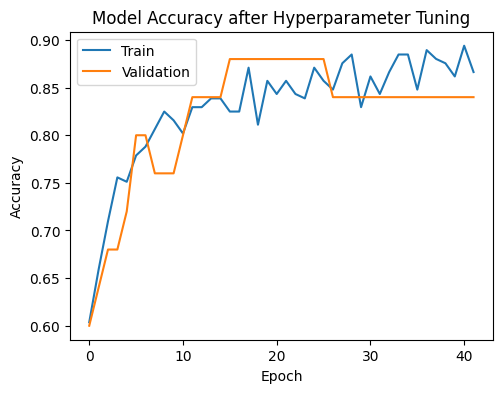

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()



Plot training & validation loss values

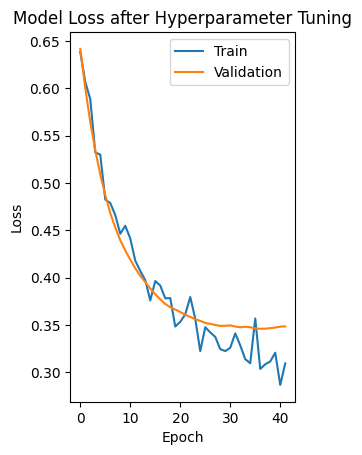

In [27]:


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss after Hyperparameter Tuning')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [28]:
y_pred_prob = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [29]:
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

